In [1]:
import numpy as np
import pandas as pd

pd.__version__

'1.5.3'

In [2]:
feature_name_df = pd.read_csv('/content/features.txt', sep='\s+', header=None, names=['index', 'feature_name'])

In [3]:
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [4]:
feature_name_df.shape

(561, 2)

In [5]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [6]:
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [24]:
X_train = pd.read_csv('/content/X_train.txt', sep='\s+')
X_train.columns = feature_name
X_test = pd.read_csv('/content/X_test.txt', sep='\s+')
X_test.columns = feature_name
Y_train = pd.read_csv('/content/y_train.txt', sep='\s+')
Y_train.columns = ['action']
Y_test = pd.read_csv('/content/y_test.txt', sep='\s+')
Y_test.columns = ['action']

In [25]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7351, 561), (7351, 1), (2946, 561), (2946, 1))

In [26]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [27]:
print(Y_train['action'].value_counts())

6    1407
5    1373
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [28]:
label_name_df = pd.read_csv('/content/activity_labels.txt', sep='\s+', header=None)
label_name_df.columns = ['index', 'label']

In [29]:
label_name = label_name_df.iloc[:, 1].values.tolist()

In [30]:
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_HAR = DecisionTreeClassifier(random_state=156)
dt_HAR.fit(X_train, Y_train) 

DecisionTreeClassifier(random_state=156)

In [32]:
Y_predict = dt_HAR.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(Y_test, Y_predict)
print('정확도 : {0:.4f}'.format(accuracy))

정확도 : 0.8551


In [35]:
print('하이퍼 매개변수: \n', dt_HAR.get_params())

하이퍼 매개변수: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_HAR, param_grid = params, scoring = 'accuracy', cv = 5, return_train_score = True)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [39]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.849549,0.944906
1,8,0.855262,0.982485
2,10,0.850912,0.993470
3,12,0.845062,0.997177
4,16,0.846558,0.999660
5,20,0.851047,0.999966
6,24,0.849688,1.000000


In [42]:
print('최고 평균 정확도: {0:.4f}, 최적 하이퍼 매개변수: {1}'.format(grid_cv.best_score_, grid_cv.best_params_))

최고 평균 정확도: 0.8553, 최적 하이퍼 매개변수: {'max_depth': 8}


In [43]:
params = {
    'max_depth': [8, 16, 20],
    'min_samples_split': [8, 16, 24]
}

grid_cv = GridSearchCV(dt_HAR, param_grid = params, scoring = 'accuracy', cv = 5, return_train_score = True)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [50]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,8,0.853224,0.981261
1,8,16,0.856081,0.979595
2,8,24,0.851727,0.977996
3,16,8,0.842885,0.994491
4,16,16,0.846966,0.990240
5,16,24,0.850230,0.986294
6,20,8,0.845061,0.994525
7,20,16,0.846558,0.990240
8,20,24,0.852135,0.986294


In [51]:
print('최고 평균 정확도: {0:.4f}, 최적 하이퍼 매개변수: {1}'.format(grid_cv.best_score_, grid_cv.best_params_))

최고 평균 정확도: 0.8561, 최적 하이퍼 매개변수: {'max_depth': 8, 'min_samples_split': 16}


In [52]:
best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)

print('best 결정 트리 예측 정확도: {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도: 0.8720


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index = X_train.columns)

In [55]:
feature_top10 = feature_importance_values_s.sort_values(ascending = False)[:10]

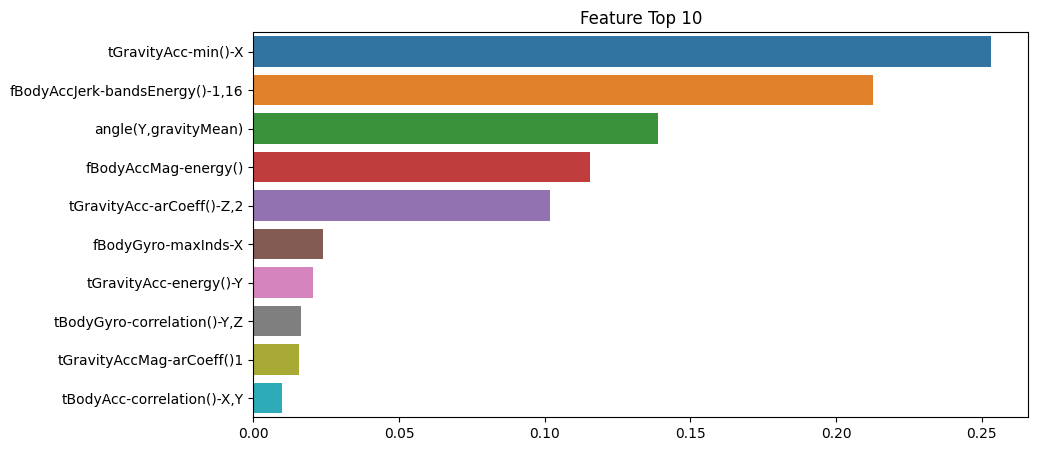

In [56]:
plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x = feature_top10, y = feature_top10.index)
plt.show()

In [57]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from sklearn.tree import export_graphviz

export_graphviz(best_dt_HAR, out_file="tree.dot", class_names=label_name, feature_names = feature_name, impurity=True, filled=True)

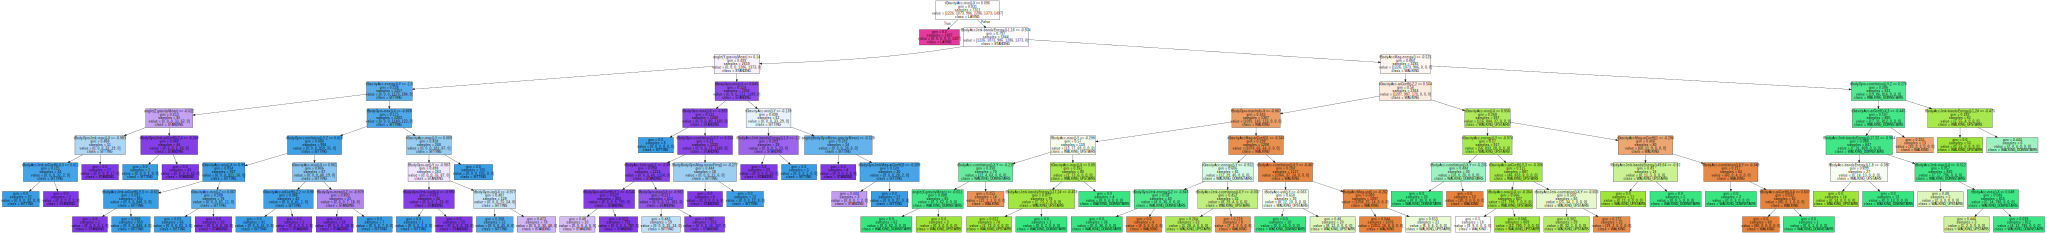

In [62]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)